# 乳癌資料分析
https://alankrantas.medium.com/%E7%94%A8%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92%E6%A8%A1%E5%9E%8B%E7%94%A2%E7%94%9F%E5%9C%96%E8%A1%A8-%E7%A7%92%E6%87%82%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92%E7%9A%84%E5%8E%9F%E7%90%86-%E4%BB%A5-matplotlib-%E8%A6%96%E8%A6%BA%E5%8C%96-scikit-learn-%E7%9A%84%E5%88%86%E9%A1%9E%E5%99%A8-knn-%E9%82%8F%E8%BC%AF%E6%96%AF%E8%BF%B4%E6%AD%B8-svm-%E6%B1%BA%E7%AD%96%E6%A8%B9-%E9%9A%A8%E6%A9%9F%E6%A3%AE%E6%9E%97-2f01aec48b54

In [1]:
from sklearn.datasets import load_breast_cancer

In [10]:
import numpy as np

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## Step 1. PCA principal component analysis 主成份分析
資料中有許多特徵，可以藉由 PCA 找到變異解釋力最大的特徵<br>
「主成分分析在機器學習內被歸類成為降維(Dimension reduction)內特徵擷取(Feature extraction)的一種方法，降維就是希望資料的維度數減少，但整體的效能不會差異太多甚至會更好」<br>
PCA 結果 = PCA(n_components= n ).fit(dx) #n = 變異解釋力最大的前幾個 #dx 資料集
<br>
<br>
https://chih-sheng-huang821.medium.com/%E6%A9%9F%E5%99%A8-%E7%B5%B1%E8%A8%88%E5%AD%B8%E7%BF%92-%E4%B8%BB%E6%88%90%E5%88%86%E5%88%86%E6%9E%90-principle-component-analysis-pca-58229cd26e71

In [2]:
from sklearn.decomposition import PCA

In [3]:
dx = load_breast_cancer().data  # 取出特徵資料

# 對特徵資料跑 PCA, 取變異解釋能力最大的 2 個特徵
pca = PCA(n_components=2).fit(dx)

In [9]:
# 印出變異解釋能力百分比
print(pca.explained_variance_ratio_.round(3)) #round 小數點後幾位

[0.982 0.016]


In [12]:
# 查看所有特徵的變異解釋能力
features_names = load_breast_cancer().feature_names

pca_1 = PCA().fit(dx)

# 依變異解釋能力找出對應特徵
indexes = np.argmax(np.abs(pca_1.components_), axis=1)
var_ratio = pca_1.explained_variance_ratio_ * 100
for i, idx in enumerate(indexes):
    print(f'PC{i+1} ({var_ratio[i]:.5f} %) ' + \
          f'feature {idx} ({features_names[idx]})')

PC1 (98.20447 %) feature 23 (worst area)
PC2 (1.61765 %) feature 3 (mean area)
PC3 (0.15575 %) feature 13 (area error)
PC4 (0.01209 %) feature 22 (worst perimeter)
PC5 (0.00883 %) feature 21 (worst texture)
PC6 (0.00066 %) feature 2 (mean perimeter)
PC7 (0.00040 %) feature 1 (mean texture)
PC8 (0.00008 %) feature 12 (perimeter error)
PC9 (0.00003 %) feature 20 (worst radius)
PC10 (0.00002 %) feature 11 (texture error)
PC11 (0.00001 %) feature 26 (worst concavity)
PC12 (0.00000 %) feature 0 (mean radius)
PC13 (0.00000 %) feature 25 (worst compactness)
PC14 (0.00000 %) feature 28 (worst symmetry)
PC15 (0.00000 %) feature 10 (radius error)
PC16 (0.00000 %) feature 27 (worst concave points)
PC17 (0.00000 %) feature 16 (concavity error)
PC18 (0.00000 %) feature 27 (worst concave points)
PC19 (0.00000 %) feature 8 (mean symmetry)
PC20 (0.00000 %) feature 6 (mean concavity)
PC21 (0.00000 %) feature 5 (mean compactness)
PC22 (0.00000 %) feature 29 (worst fractal dimension)
PC23 (0.00000 %) fea

## Step 2. 整理與分割

In [14]:
# 取出資料
dx = load_breast_cancer().data
dy = load_breast_cancer().target
# 用 PCA 留下變異度最大的 2 個特徵
dx = PCA(n_components=2).fit_transform(dx)
# 特徵資料標準化 (將特徵資料縮放到平均=0, 標準差=1)
dx = StandardScaler().fit_transform(dx)

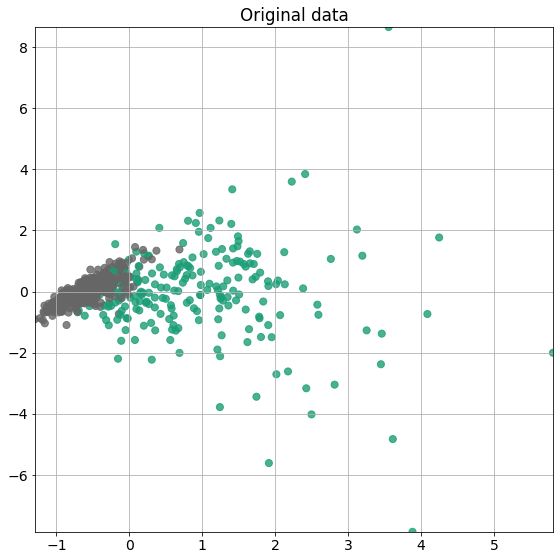

In [15]:
# 繪圖
plt.figure(figsize=(8, 8))  # 設定新圖表大小
plt.rcParams['font.size'] = 14  # 設定圖表字體大小
plt.title('Original data')  # 圖表標題

# 將資料繪成散佈圖 (根據標籤分顏色)
plt.scatter(*dx.T, c=dy, cmap='Dark2', s=50, alpha=0.8)
plt.grid(True)  # 繪製格線

# 設定 X 與 Y 軸顯示範圍
plt.xlim([np.amin(dx.T[0]), np.amax(dx.T[0])])
plt.ylim([np.amin(dx.T[1]), np.amax(dx.T[1])])
plt.tight_layout()  # 減少圖表的白邊
plt.show()  # 顯示圖表